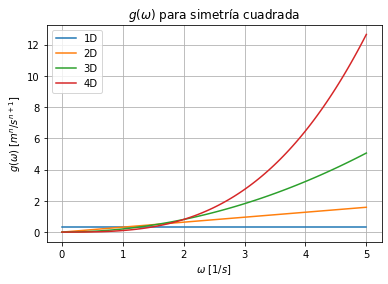

<Figure size 432x288 with 0 Axes>

In [24]:
import numpy as np
import matplotlib.pyplot as plt
import math
from mpmath import zeta
omega = np.linspace(0, 5, 100)  # Rango de valores de omega
T= np.linspace(273.15, 373.15, 100) # Rango de valores de temperatura
cs = 1 #343.2  # m/s
L = 1  # m
dimensions = [1, 2, 3, 4]
Kb=1 #1,380649 × 10−23 J/K
hbarr=1 #1,054 571 817 × 10-34	J⋅s 

omega = np.linspace(0, 5, 100)  # Rango de valores de omega
dimensions = [1, 2, 3, 4]
def fung_omega(V, n, cs, o):
    g = (2*V/(2*(np.pi**(0.5))**n)*(1/math.gamma(n/2))*(o**(n-1)/(cs**n)))
    return g

for i, dimension in enumerate(dimensions):
    V = L**i
    g_omega = fung_omega(V, dimension, cs, omega)
    plt.plot(omega, g_omega, label=f"{dimension}D")

plt.xlabel("$\omega$ [$1/s$]")
plt.ylabel("$g(\omega)$ [$m^{n}/s^{n+1}}$]")
plt.title("$g(\omega)$ para simetría cuadrada")
plt.legend()
plt.grid(True)
plt.show()
plt.savefig("gvsw.jpg")

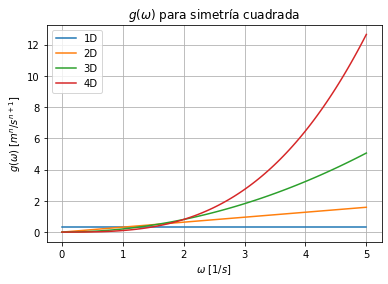

<Figure size 432x288 with 0 Axes>

In [22]:
omega = np.linspace(0, 5, 100)  # Rango de valores de omega
dimensions = [1, 2, 3, 4]
def fung_omega(V, n, cs, o):
    g = (2*V/(2*(np.pi**(0.5))**n)*(1/math.gamma(n/2))*(o**(n-1)/(cs**n)))
    return g

for i, dimension in enumerate(dimensions):
    V = L**i
    g_omega = fung_omega(V, dimension, cs, omega)
    plt.plot(omega, g_omega, label=f"{dimension}D")

plt.xlabel("$\omega$ [$1/s$]")
plt.ylabel("$g(\omega)$ [$m^{n}/s^{n+1}}$]")
plt.title("$g(\omega)$ para simetría cuadrada")
plt.legend()
plt.grid(True)
plt.show()
plt.savefig("g(w) vs dimensiones.jpg")


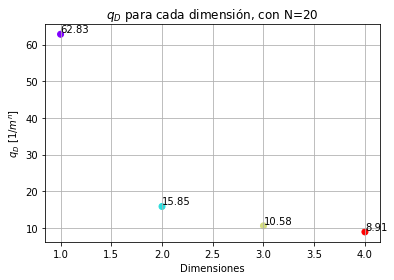

In [3]:
N = 20
qd = np.zeros(len(dimensions))

def funqd(N, V, n):
    q = 2 * (np.pi) ** (0.5) * ((n * N * math.gamma(n / 2)) / (2 * V)) ** (1 / n)
    return q

for i, dimension in enumerate(dimensions):
    V = L**i
    qd[i] = funqd(N, V, dimension)

plt.scatter(dimensions, qd, c=range(len(dimensions)), cmap='rainbow')
for dim, q in zip(dimensions, qd):
    plt.text(dim, q, f"{q:.2f}", ha='left', va='bottom')

plt.xlabel("Dimensiones")
plt.ylabel("$q_D$ [$1/m^{n}$]")
plt.title("$q_D$ para cada dimensión, con N="+str(N))
#plt.colorbar(label="Índice de color")
plt.grid(True)
plt.savefig("q_d vs dimensiones.jpg")



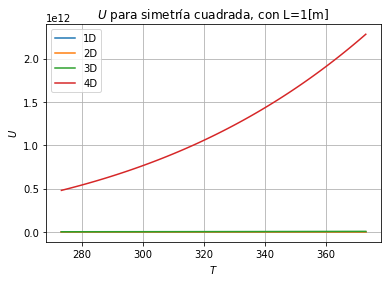

In [6]:
T= np.linspace(273.15, 373.15, 100) # Rango de valores de temperatura
dimensions=[1,2,3,4]
def Energia(V,n,hbarr,Kb,T):
    U= (2*V/(2*np.pi**(0.5))**n)*(hbarr/math.gamma(n/2))*(1/cs**n)*(Kb*T/hbarr)**(n+1)*(math.gamma(n+1))*(zeta(n+1))
    return U
for i, dimension in enumerate(dimensions):
    V = L ** i
    U = Energia(V, dimension, hbarr, Kb, T)
    plt.plot(T, U, label=f"{dimension}D")

plt.xlabel("$T$")
plt.ylabel("$U$")
plt.title("$U$ para simetría cuadrada, con L=" + str(L) + "[m]")
plt.legend()
plt.grid(True)
#plt.yscale('log')  # Cambiar a escala logarítmica en el eje y
plt.show()

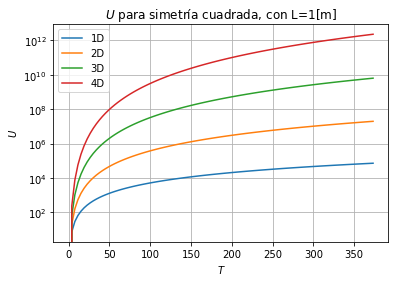

In [7]:
T= np.linspace(0, 373.15, 100) # Rango de valores de temperatura
def Energia(V,n,hbarr,Kb,T):
    U= (2*V/(2*np.pi**(0.5))**n)*(hbarr/math.gamma(n/2))*(1/cs**n)*(Kb*T/hbarr)**(n+1)*(math.gamma(n+1))*(zeta(n+1))
    return U
for i, dimension in enumerate(dimensions):
    V = L ** i
    U = Energia(V, dimension, hbarr, Kb, T)
    plt.plot(T, U, label=f"{dimension}D")

plt.xlabel("$T$")
plt.ylabel("$U$")
plt.title("$U$ para simetría cuadrada, con L=" + str(L) + "[m]")
plt.legend()
plt.grid(True)
plt.yscale('log')  # Cambiar a escala logarítmica en el eje y
plt.show()

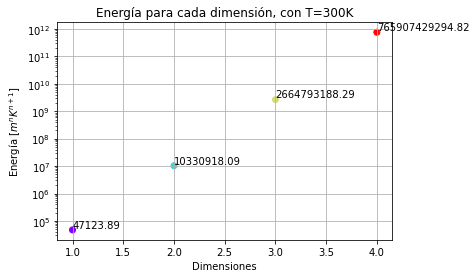

In [8]:
U = np.zeros(len(dimensions))
T=300 #K
def Energia(V,n,hbarr,Kb,T):
    U= (2*V/(2*np.pi**(0.5))**n)*(hbarr/math.gamma(n/2))*(1/cs**n)*(Kb*T/hbarr)**(n+1)*(math.gamma(n+1))*(zeta(n+1))
    return U
for i, dimension in enumerate(dimensions):
    V = L**i
    U[i] = Energia(V,dimension,hbarr,Kb,T)
plt.scatter(dimensions, U, c=range(len(dimensions)), cmap='rainbow')
for dim, u in zip(dimensions, U):
    plt.text(dim, u, f"{u:.2f}", ha='left', va='bottom')

plt.xlabel("Dimensiones")
plt.ylabel("Energía [$m^{n}K^{n+1}$]")
plt.yscale('log')  # Cambiar a esca
plt.title("Energía para cada dimensión, con T="+str(T)+"K")

plt.grid(True)
plt.savefig("U vs dimensiones T cte.jpg")



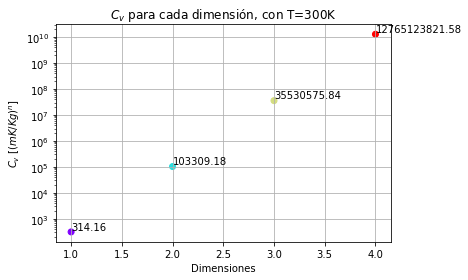

In [9]:
from mpmath import zeta
Cv = np.zeros(len(dimensions))
T=300
def specificheat(V,n,Kb,T,cs,hbarr):
    cv=(2*V/(2*np.pi**(0.5))**n)*((math.gamma(n+1)*(zeta(n+1)))/(math.gamma(n/2)))*((n+1)/(cs*hbarr)**n)*((Kb)**(n+1))*(T**n)
    return cv

for i, dimension in enumerate(dimensions):
    V = L**i
    Cv[i] = specificheat(V,dimension,Kb,T,cs,hbarr)

plt.scatter(dimensions, Cv, c=range(len(dimensions)), cmap='rainbow')
for dim, u in zip(dimensions, Cv):
    plt.text(dim, u, f"{u:.2f}", ha='left', va='bottom')

plt.xlabel("Dimensiones")
plt.ylabel("$C_v$ [$(mK/Kg)^{n}$]")
plt.yscale('log')  # Cambiar a esca
plt.title("$C_v$ para cada dimensión, con T="+str(T)+"K")

plt.grid(True)
plt.savefig("cv vs dimensiones.jpg")




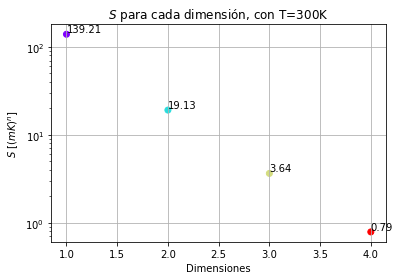

In [11]:
def entropia(V,n,Kb,T,cs,hbarr):
    S=(2*V/(2*np.pi**(0.5))**n)*((math.gamma(n+1)*(zeta(n+1)))/(math.gamma(n+2)))*(1/(cs*hbarr)**n)*((Kb)**(n+1))*(T)
    return S
S=np.zeros(len(dimensions))
for i, dimension in enumerate(dimensions):
    V = L**i
    S[i] = entropia(V,dimension,Kb,T,cs,hbarr)

plt.scatter(dimensions, S, c=range(len(dimensions)), cmap='rainbow')
for dim, s in zip(dimensions, S):
    plt.text(dim, s, f"{s:.2f}", ha='left', va='bottom')

plt.xlabel("Dimensiones")
plt.ylabel("$S$ [$(m K)^{n}$]")
plt.yscale('log')  # Cambiar a esca
plt.title("$S$ para cada dimensión, con T="+str(T)+"K")

plt.grid(True)
plt.savefig("Entropía vs dimensiones.jpg")
